Disciplina : TAC 1 - Ciência de Dados

Discente : Igor Alex Farias

Docente : Eric Aguiar



# Redes Neurais Artificiais (ANNs)

# Histórico

As ANNs foram inspiradas pela estrutura e funcionamento do cérebro humano e têm raízes na década de 1940, quando Warren McCulloch e Walter Pitts introduziram o conceito de "neurônio artificial". A evolução do campo ocorreu nas décadas seguintes, mas os avanços em hardware e o aumento dos dados disponíveis nos anos 2000 permitiram que as ANNs se tornassem uma ferramenta poderosa para resolver problemas de reconhecimento de padrões e aprendizado de máquina.

As Redes Neurais Artificiais (ANNs) são, uma das principais técnicas de deep learning e formam a base de praticamente todas as redes neurais complexas usadas atualmente. Elas são o ponto de partida a partir do qual as outras redes neurais (CNNs, RNNs, etc.) foram desenvolvidas e especializadas.

# Em que consiste
ANNs são compostas por neurônios artificiais organizados em camadas: camada de entrada, camadas ocultas e camada de saída. Cada neurônio recebe entradas, aplica pesos, calcula uma soma ponderada e utiliza uma função de ativação para determinar a saída.

Funções de ativação: Comuns em ANNs incluem ReLU, sigmoid e tanh, que ajudam a introduzir não-linearidades, tornando a rede capaz de aprender padrões complexos.

ReLU (Rectified Linear Unit) :   

A função ReLU retorna zero para valores negativos de x e retorna o valor x para valores positivos.

Sigmoid :   

A função sigmoid transforma qualquer valor de entrada em uma saída entre 0 e 1. Para valores muito negativos, a saída é próxima de 0, enquanto para valores muito positivos, a saída se aproxima de 1.

tanh (Tangente Hiperbólica) :    

A função tanh transforma qualquer valor de entrada em uma saída entre -1 e 1. Para valores negativos, a saída é próxima de -1, e para valores positivos, é próxima de 1.

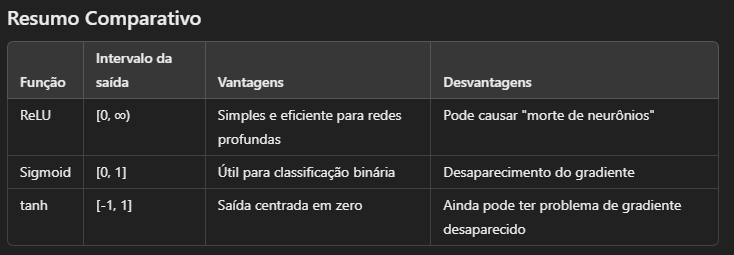

Em termos simples, o gradiente é uma taxa de variação que indica a direção e a intensidade com que uma função muda em relação a seus parâmetros.

Treinamento: Durante o treinamento, a rede ajusta os pesos com retropropagação para minimizar a diferença entre as previsões da rede e os valores reais. Esse processo usa algoritmos de otimização, como descida de gradiente.
# Limitações
Tendência a overfitting: ANNs podem memorizar os dados de treinamento, principalmente se forem pequenas e com poucas camadas.

Desempenho em dados complexos: ANNs tradicionais (sem camadas convolucionais ou de atenção) não capturam bem padrões complexos em dados visuais ou sequenciais.

Consumo computacional: Redes com muitas camadas e neurônios exigem maior poder computacional.

#  Como implementar

Dados: Podem trabalhar com dados tabulares, imagens, texto ou qualquer conjunto de dados estruturado, desde que pré-processados adequadamente.

Estrutura do Modelo: Defina camadas densas (Dense). Elas são componentes fundamentais que conectam todos os neurônios de uma camada à próxima camada.

Treinamento: As ANNs requerem dados rotulados para treinamento supervisionado, mas podem ser aplicadas a problemas não supervisionados em algumas arquiteturas especializadas.

Ferramentas e frameworks: Keras (TensorFlow), PyTorch e scikit-learn são ferramentas populares que oferecem módulos para criação e treinamento de ANNs. É possível personalizar as camadas e funções de ativação para adaptar a rede ao problema específico.

Uso: Aplicável a problemas de classificação e regressão.

In [8]:
import csv
import pandas as pd

arquivo_entrada = "Mega-Sena.csv"
arquivo_saida = "Mega-Sena_corrigido.csv"

with open(arquivo_entrada, encoding="utf-8") as f:
    reader = csv.reader(f, delimiter=";")
    linhas = list(reader)

# Número correto de colunas (baseado no cabeçalho)
num_colunas = len(linhas[0])

linhas_corrigidas = []
for linha in linhas:
    if len(linha) > num_colunas:
        linha = linha[:num_colunas]        # corta excesso
    elif len(linha) < num_colunas:
        linha += [""] * (num_colunas - len(linha))  # completa faltantes
    linhas_corrigidas.append(linha)

with open(arquivo_saida, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f, delimiter=";")
    writer.writerows(linhas_corrigidas)

# Agora lê o CSV corrigido
df = pd.read_csv(arquivo_saida, sep=";")

print("CSV corrigido com sucesso!")

CSV corrigido com sucesso!


In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Leitura segura do CSV
df = pd.read_csv(
    "Mega-Sena_corrigido.csv",
    sep=";",
    engine="python"
)

# Colunas das bolas
colunas_bolas = ['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']

# Converter para numérico
for col in colunas_bolas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Criar a coluna Soma
df['Soma'] = df[colunas_bolas].sum(axis=1)

# Remover linhas inválidas
df = df.dropna(subset=colunas_bolas + ['Soma'])

# Entradas e saída
X = df[colunas_bolas]
y = df['Soma']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo ANN
model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilação
model_ann.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# Treinamento
model_ann.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.1,
    batch_size=32
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 34575.5742 - mae: 181.6179 - val_loss: 32629.1074 - val_mae: 175.3231
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 31712.3535 - mae: 173.4906 - val_loss: 24530.1934 - val_mae: 151.3431
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21531.1660 - mae: 141.4882 - val_loss: 10623.4141 - val_mae: 95.1820
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9116.3730 - mae: 87.2588 - val_loss: 5689.9888 - val_mae: 64.7264
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4907.1514 - mae: 60.0772 - val_loss: 4459.5986 - val_mae: 56.2923
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3678.2317 - mae: 51.0084 - val_loss: 3445.1150 - val_mae: 49.2522
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2822.9365 - mae: 44.1776 - val_loss: 2673.7300 - val_mae: 43.2380
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2092.6875 - mae: 38.2375 - val_loss: 1989.4520 - val_m

In [12]:
# Avaliação do modelo no conjunto de teste
loss, mae = model_ann.evaluate(X_test, y_test, verbose=0)
print(f'MAE (Erro Absoluto Médio): {mae:.2f}')
print(f'MSE (Erro Quadrático Médio): {loss:.2f}')


MAE (Erro Absoluto Médio): 0.12
MSE (Erro Quadrático Médio): 0.04


In [13]:
# Previsões no conjunto de teste
y_pred = model_ann.predict(X_test)

# Mostrando previsões e valores reais
import pandas as pd
df_results = pd.DataFrame({'Valor Real': y_test, 'Previsão': y_pred.flatten()})
print(df_results.head(10))


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
      Valor Real    Previsão
1968         197  196.986099
124          281  281.174164
1127         199  198.947479
1615         245  245.087555
1359         164  163.891861
650          246  246.076141
1706         158  157.886917
2019         249  249.134735
173          203  202.974045
461          159  158.892838


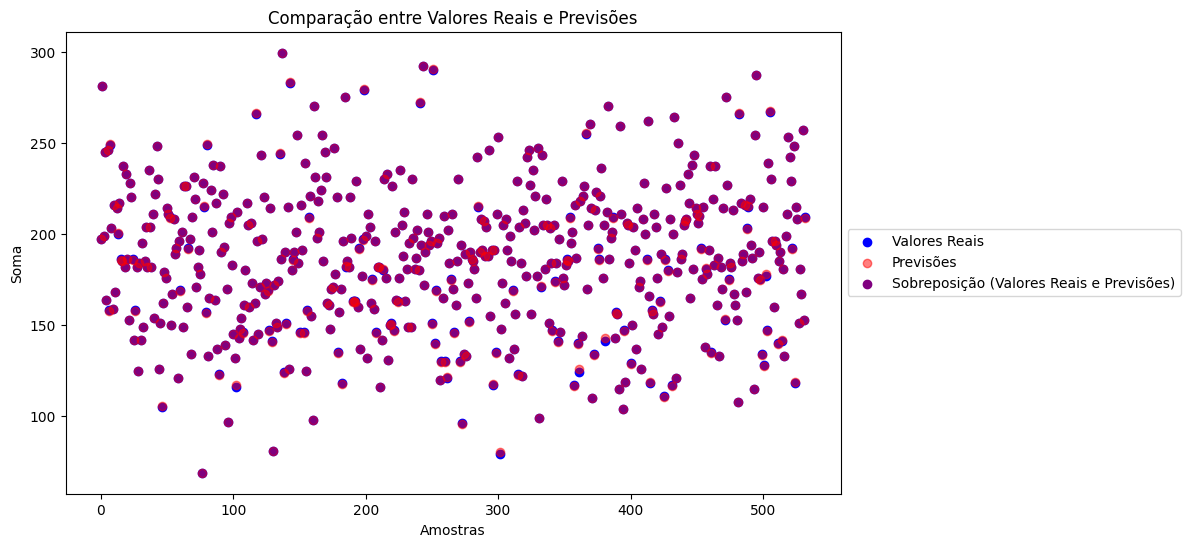

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valores Reais')
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Previsões')
plt.scatter([], [], color='purple', label='Sobreposição (Valores Reais e Previsões)')
plt.xlabel('Amostras')
plt.ylabel('Soma')
plt.title('Comparação entre Valores Reais e Previsões')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
# Leitura segura
df = pd.read_csv(
    "Mega-Sena_corrigido.csv",
    sep=";",
    engine="python"
)

colunas_bolas = ['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']

# Converter para número
for col in colunas_bolas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=colunas_bolas).reset_index(drop=True)

In [17]:
X = df[colunas_bolas].iloc[:-1].values
y = df[colunas_bolas].iloc[1:].values

In [18]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6)  # 6 números de saída
])

model.compile(
    optimizer='adam',
    loss='mse'
)

model.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9845 - val_loss: 0.9996
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0206 - val_loss: 0.9958
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0126 - val_loss: 0.9992
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9953 - val_loss: 1.0018
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9644 - val_loss: 1.0099
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9665 - val_loss: 1.0023
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9854 - val_loss: 1.0083
Epoch 8/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9682 - val_loss: 1.0101
Epoch 9/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9742 - val_loss: 1.0065
Epoch 10/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9822 - val_loss: 1.0109
Epoch 11/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9456 - val_loss: 1.0165
Epoch 12/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9788 - val_lo

In [21]:
# Último concurso conhecido
ultimo_jogo = df[colunas_bolas].iloc[-1].values.reshape(1, -1)

# Normalizar
ultimo_jogo_norm = scaler_X.transform(ultimo_jogo)

# Previsão
previsao_norm = model.predict(ultimo_jogo_norm)

# Voltar para escala original
previsao = scaler_y.inverse_transform(previsao_norm)

# Arredondar e limitar entre 1 e 60
numeros_previstos = np.clip(
    np.round(previsao[0]),
    1,
    60
).astype(int)

# Ordenar como jogo real
numeros_previstos = np.sort(numeros_previstos)

print("🎯 Números previstos:", numeros_previstos)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
🎯 Números previstos: [ 8 16 23 33 43 52]


In [22]:
import numpy as np

# Último concurso conhecido
ultimo_jogo = df[colunas_bolas].iloc[-1].values.reshape(1, -1)

# Normalizar entrada
ultimo_jogo_norm = scaler_X.transform(ultimo_jogo)

# Previsão dos 6 números
previsao_norm = model.predict(ultimo_jogo_norm)
previsao = scaler_y.inverse_transform(previsao_norm)

# Arredondar, limitar e remover duplicatas
numeros_previstos = np.clip(
    np.round(previsao[0]),
    1,
    60
).astype(int)

numeros_previstos = list(set(numeros_previstos))

# Gerar o 7º número (sem repetir)
while len(numeros_previstos) < 7:
    novo = np.random.randint(1, 61)
    if novo not in numeros_previstos:
        numeros_previstos.append(novo)

# Ordenar como jogo real
numeros_previstos = np.sort(numeros_previstos)

print("🎯 Números previstos (7):", numeros_previstos)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
🎯 Números previstos (7): [ 8 15 16 23 33 43 52]


# Redes Neurais Convolucionais (CNNs)

# Histórico

As CNNs surgiram em 1989 com o LeNet-5, desenvolvido por Yann LeCun, para o reconhecimento de dígitos manuscritos. A CNN ganhou popularidade após o sucesso no ImageNet Challenge, em 2012, com o AlexNet, que estabeleceu uma nova referência na precisão do reconhecimento de imagens.

# Em que consiste
A lógica das CNNs envolve aplicar filtros convolucionais que capturam padrões locais em imagens, como bordas e texturas. As CNNs geralmente incluem:

Camadas convolucionais: Extraem características espaciais, permitindo que a rede identifique padrões como bordas, formas e objetos.

Camadas de pooling: Reduzem a dimensionalidade da imagem, preservando características importantes e aumentando a eficiência computacional.

Camadas fully connected: Utilizadas ao final para classificação ou regressão.
# Limitações

Dependência de dados: CNNs precisam de grandes quantidades de dados para treinamento.

Dificuldade em capturar relações contextuais: Não capturam facilmente relações entre objetos distantes na imagem.

Consumo de recursos computacionais: Exigem processamento intenso, especialmente para redes profundas.

# Como implementar

Dados: As CNNs são xcelentes para reconhecimento de imagem e processamento de dados visuais, mas também conseguem lidar com valores numéricos, é necessário transformar os dados para 3D.

Construção da CNN: Use camadas Conv1D, MaxPooling1D, e Flatten.

Treinamento: CNNs geralmente são treinadas com grandes conjuntos de dados usando otimização por retropropagação e descida de gradiente.

Ferramentas e frameworks: Bibliotecas como TensorFlow, PyTorch e Keras simplificam a implementação.

In [42]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
df = pd.read_csv(
    "Mega-Sena_corrigido.csv",
    sep=";",
    engine="python"
)

In [44]:
colunas_bolas = ['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']

# Converter para numérico
for col in colunas_bolas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remover linhas inválidas
df = df.dropna(subset=colunas_bolas).reset_index(drop=True)

In [45]:
X = df[colunas_bolas].iloc[:-1].values
y = df[colunas_bolas].iloc[1:].values

In [46]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
X_train = X_train.reshape(-1, 6, 1)
X_test  = X_test.reshape(-1, 6, 1)

In [49]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv1D(
        filters=32,
        kernel_size=2,
        activation='relu',
        input_shape=(6, 1)
    ),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6)  # <<< 6 números
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model_cnn.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model_cnn.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.9849 - mae: 0.7968 - val_loss: 0.9906 - val_mae: 0.8063
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9996 - mae: 0.8051 - val_loss: 0.9938 - val_mae: 0.8078
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9816 - mae: 0.7937 - val_loss: 0.9991 - val_mae: 0.8069
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9639 - mae: 0.7888 - val_loss: 0.9947 - val_mae: 0.8078
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9768 - mae: 0.7954 - val_loss: 0.9947 - val_mae: 0.8061
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9911 - mae: 0.7949 - val_loss: 0.9982 - val_mae: 0.8087
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9803 - mae: 0.7959 - val_loss: 0.9994 - val_mae: 0.8078
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9645 - mae: 0.7881 - val_loss: 0.9980 - val_mae: 0.8079
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.96

In [51]:
# Previsões
y_pred = model_cnn.predict(X_test)

# Voltar para escala original
y_test_real = scaler_y.inverse_transform(y_test)
y_pred_real = scaler_y.inverse_transform(y_pred)

# DataFrame de comparação (primeiros 2 números)
df_results = pd.DataFrame({
    'Real_B1': y_test_real[:, 0],
    'Prev_B1': y_pred_real[:, 0],
    'Real_B2': y_test_real[:, 1],
    'Prev_B2': y_pred_real[:, 1],
})

print(df_results.head(10))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
   Real_B1    Prev_B1  Real_B2    Prev_B2
0      5.0  12.559977     10.0  23.591963
1      6.0   9.385920     10.0  17.381775
2     12.0   9.776958     17.0  17.784025
3      3.0  10.725756     23.0  18.392889
4     23.0   6.216116     27.0  15.479749
5     10.0   9.674848     18.0  18.132359
6     17.0   8.826216     29.0  16.911846
7      7.0   7.037796     14.0  16.145864
8      1.0   7.727959     10.0  15.596383
9      2.0   6.015154      3.0  15.124100


In [52]:
# Último concurso conhecido
ultimo_jogo = df[colunas_bolas].iloc[-1].values.reshape(1, -1)

# Normalizar
ultimo_jogo_norm = scaler_X.transform(ultimo_jogo)

# Reshape para CNN
ultimo_jogo_norm = ultimo_jogo_norm.reshape(1, 6, 1)

# Previsão
previsao_norm = model_cnn.predict(ultimo_jogo_norm)
previsao = scaler_y.inverse_transform(previsao_norm)

# Arredondar, limitar e ordenar
numeros_previstos = np.clip(
    np.round(previsao[0]),
    1,
    60
).astype(int)

numeros_previstos = np.sort(numeros_previstos)

print("🎯 Números previstos:", numeros_previstos)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
🎯 Números previstos: [ 9 17 25 34 42 50]


7 NÚMEROS

In [54]:
import numpy as np

# y atual tem shape (N, 6)
bola7 = y.mean(axis=1).reshape(-1, 1)

# y passa a ter shape (N, 7)
y = np.hstack([y, bola7])

In [55]:
tf.keras.layers.Dense(7)

<Dense name=dense_10, built=False>

In [56]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=2, activation='relu', input_shape=(6, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7)  # <<< mudança aqui
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
# Previsão normalizada (7 valores)
previsao_norm = model_cnn.predict(ultimo_jogo_norm)

# Separar:
# - 6 primeiros números (normalizados corretamente)
# - 7º número (não escalado)
previsao_6 = previsao_norm[:, :6]
previsao_7 = previsao_norm[:, 6].reshape(-1, 1)

# Inverter escala APENAS dos 6 primeiros
previsao_6_real = scaler_y.inverse_transform(previsao_6)

# Juntar novamente
previsao_final = np.hstack([previsao_6_real, previsao_7])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [59]:
numeros_previstos = np.clip(
    np.round(previsao_final[0]),
    1,
    60
).astype(int)

# Garantir 7 números únicos
numeros_previstos = list(set(numeros_previstos))
while len(numeros_previstos) < 7:
    n = np.random.randint(1, 61)
    if n not in numeros_previstos:
        numeros_previstos.append(n)

numeros_previstos = np.sort(numeros_previstos)

print("🎯 Números previstos (7):", numeros_previstos)

🎯 Números previstos (7): [ 1  9 17 25 33 43 52]


# Redes Neurais Recorrentes (RNNs)

# Histórico

As RNNs foram introduzidas na década de 1980, mas só ganharam destaque com o desenvolvimento das LSTMs por Sepp Hochreiter e Jürgen Schmidhuber em 1997. As LSTMs foram projetadas para resolver o problema de vanishing gradient, que limitava o aprendizado em sequências longas.

# Em que consiste
RNNs têm conexões internas que permitem "memória" de etapas anteriores da sequência. Cada neurônio recebe entrada e também o estado anterior, o que ajuda a capturar a dependência sequencial.

LSTMs e GRUs: São variações de RNNs que utilizam portas especiais para controlar o fluxo de informações e minimizar problemas de gradiente.

# Limitações
Vanishing gradient: Redes recorrentes simples enfrentam problemas de gradiente desaparecendo em sequências longas.

Demanda computacional: RNNs sequenciais são difíceis de paralelizar, o que aumenta o tempo de treinamento.

Contexto limitado: RNNs têm dificuldades em capturar dependências distantes em sequências longas.

# Como implementar
Dados: Utilizam dados sequenciais (texto, áudio, séries temporais) rotulados.

Estrutura do Modelo: Utilize camadas SimpleRNN, LSTM ou GRU.

Treinamento: Treinamento envolve otimização por retropropagação através do tempo (BPTT).

Ferramentas e frameworks: Frameworks como PyTorch e TensorFlow têm implementações otimizadas de LSTMs e GRUs.

In [62]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Selecionar apenas os números sorteados (Bola1 a Bola6)
numeros = df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].values

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
numeros_normalizados = scaler.fit_transform(numeros)

# Definir a sequência de entrada e saída (janela de tempo)
def criar_sequencias(dados, janela=3):
    X, y = [], []
    for i in range(len(dados) - janela):
        X.append(dados[i:i+janela])
        y.append(dados[i+janela])
    return np.array(X), np.array(y)

# Criar dados de treinamento e teste
janela = 3
X, y = criar_sequencias(numeros_normalizados, janela)

# Dividir os dados entre treinamento e teste
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Criar o modelo RNN
modelo_rnn = Sequential()
modelo_rnn.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
modelo_rnn.add(Dense(6))  # 6 saídas, correspondendo aos números sorteados
modelo_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
modelo_rnn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)



Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2570
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0411
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0390
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0367
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0376
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0361
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0360
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0357
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0346
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0335
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0343
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0340
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0335
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0342
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0339
Epoch 16/50
67/67 ━━━━━━━━━━━━

In [63]:
# Testar o modelo
previsoes = modelo_rnn.predict(X_test)
previsoes_desnormalizadas = scaler.inverse_transform(previsoes)

print(previsoes_desnormalizadas[:5])  # Mostrar as primeiras 5 previsões

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[ 9.026003 17.821377 26.262026 35.621017 44.333843 52.573227]
 [ 7.685118 15.925837 24.055485 32.78289  43.5335   52.33278 ]
 [10.60724  19.016281 27.036854 36.42713  45.664734 53.1933  ]
 [ 8.413633 17.513344 26.58466  36.465355 47.304123 53.779842]
 [ 9.200454 18.005304 24.12114  33.76909  43.463806 52.52303 ]]


Utilizando uma janela de 20 ( últimos 20 jogos )

In [65]:
def criar_sequencias(dados, janela=20):
    X, y = [], []
    for i in range(len(dados) - janela):
        X.append(dados[i:i+janela])
        y.append(dados[i+janela])
    return np.array(X), np.array(y)

# Criar dados com janela maior
janela = 20
X, y = criar_sequencias(numeros_normalizados, janela)

In [66]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [67]:
modelo_rnn = Sequential()
modelo_rnn.add(SimpleRNN(
    50,
    activation='relu',
    input_shape=(X_train.shape[1], X_train.shape[2])
))
modelo_rnn.add(Dense(6))  # 6 números
modelo_rnn.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
modelo_rnn.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3468
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0388
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0382
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0367
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0355
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0358
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0355
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0345
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0354
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0338
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0349
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0344
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0335
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0337
Epoch 16/50
66/66 

In [69]:
previsoes = modelo_rnn.predict(X_test)
previsoes_desnormalizadas = scaler.inverse_transform(previsoes)

print(previsoes_desnormalizadas[:5])

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
[[ 6.065161  16.794651  25.699865  36.657097  44.43403   51.03242  ]
 [ 8.0362215 16.899086  26.837273  31.980415  42.90467   52.10489  ]
 [ 8.047538  17.884462  26.477533  34.056736  45.090057  52.669693 ]
 [ 7.4520283 16.432425  24.96034   33.043476  43.32131   50.517822 ]
 [10.153304  17.772568  29.049107  35.628708  43.47048   52.25484  ]]


In [70]:
# Usar os últimos 20 concursos
ultima_sequencia = numeros_normalizados[-janela:]
ultima_sequencia = ultima_sequencia.reshape(1, janela, 6)

# Previsão
previsao_norm = modelo_rnn.predict(ultima_sequencia)
previsao_6 = scaler.inverse_transform(previsao_norm)

# Pós-processamento
numeros_6 = np.clip(
    np.round(previsao_6[0]),
    1,
    60
).astype(int)

numeros_6 = np.sort(numeros_6)

print("🎯 Previsão com 6 números:", numeros_6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
🎯 Previsão com 6 números: [ 7 16 25 34 44 50]


In [71]:
# Criar lista sem repetição
numeros_7 = list(set(numeros_6))

# Gerar 7º número
while len(numeros_7) < 7:
    n = np.random.randint(1, 61)
    if n not in numeros_7:
        numeros_7.append(n)

numeros_7 = np.sort(numeros_7)

print("🎯 Previsão com 7 números:", numeros_7)

🎯 Previsão com 7 números: [ 7 16 21 25 34 44 50]


# Autoencoders

# Histórico

Os autoencoders foram inicialmente introduzidos na década de 1980 para tarefas de compressão de dados, mas passaram a ser usados em tarefas de aprendizado não supervisionado para aprendizado de características.

# Em que consiste

Autoencoders são redes neurais compostas de duas partes:

Codificador: Transforma os dados de entrada em uma representação compacta.
Decodificador: Reconstrói os dados de entrada a partir da representação compacta.

A lógica é que a rede aprenda uma representação de menor dimensionalidade, que retém as características essenciais dos dados, e então reconstrua a entrada.

# Limitações

Perda de informações: Autoencoders podem perder detalhes durante a codificação, o que prejudica a qualidade da reconstrução.

Dificuldade em generalizar: Tendem a memorizar dados de treinamento e podem não generalizar bem em novos dados.

Dependência de dados rotulados: Em tarefas de detecção de anomalias, a eficácia depende de dados limpos para treinamento.

# Como implementar

Dados: Utilizam qualquer tipo de dado que pode ser codificado, mas são comuns com dados visuais ou séries temporais.

Compilação: Use função de perda como mse.

Treinamento: Os autoencoders são treinados de maneira não supervisionada para minimizar a diferença entre a entrada e a reconstrução.

Ferramentas e frameworks: Autoencoders podem ser implementados com Keras, PyTorch, e TensorFlow.

In [72]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Selecionar apenas os números sorteados (Bola1 a Bola6)
numeros = df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].values

# Normalizar os dados entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))
numeros_normalizados = scaler.fit_transform(numeros)

# Construir o Autoencoder
input_dim = numeros_normalizados.shape[1]
encoding_dim = 3  # Vamos reduzir para 3 dimensões

autoencoder = Sequential()

# Encoder
autoencoder.add(Dense(encoding_dim, activation='relu', input_shape=(input_dim,)))

# Decoder
autoencoder.add(Dense(input_dim, activation='sigmoid'))

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o Autoencoder
autoencoder.fit(numeros_normalizados, numeros_normalizados, epochs=50, batch_size=32, verbose=1)

# Testar o modelo (usar o próprio conjunto de dados, pois é um autoencoder)
codificados = autoencoder.predict(numeros_normalizados)

# Desnormalizar os dados para ver os valores originais
codificados_desnormalizados = scaler.inverse_transform(codificados)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0515
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0384
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0343
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0310
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0308
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0287
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0277
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0271
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0250
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0239
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0226
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0201
Epoch 13/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0196
Epoch 14/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0177
Epoch 15/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168
Epoch 16/50
84/84 ━━━━━━━━━━━━

In [73]:
# Exibir as primeiras 5 previsões de números decodificados
print(codificados_desnormalizados[:5])


[[ 4.2513394 11.403528  21.203629  32.019886  43.860447  54.53156  ]
 [20.406347  30.990005  38.19266   43.14576   46.409832  51.538406 ]
 [ 8.095766  15.093614  22.400156  29.600521  37.68117   48.27348  ]
 [ 1.9922941  5.9337535 13.651107  25.805756  42.43592   55.820923 ]
 [ 3.4158964  6.68311   11.364301  18.439445  28.443008  44.088085 ]]


In [74]:
# Criar uma matriz de correlação entre os números sorteados
correlacao = df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].corr()

# Exibir a matriz de correlação
print(correlacao)


          Bola1     Bola2     Bola3     Bola4     Bola5     Bola6
Bola1  1.000000  0.640548  0.457955  0.354022  0.248510  0.164200
Bola2  0.640548  1.000000  0.711563  0.532628  0.392294  0.263753
Bola3  0.457955  0.711563  1.000000  0.755567  0.561462  0.367758
Bola4  0.354022  0.532628  0.755567  1.000000  0.736017  0.491518
Bola5  0.248510  0.392294  0.561462  0.736017  1.000000  0.656245
Bola6  0.164200  0.263753  0.367758  0.491518  0.656245  1.000000


In [76]:
df['Soma'] = df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].sum(axis=1)


In [77]:
df['Data do Sorteio'] = pd.to_datetime(df['Data do Sorteio'])


In [78]:
df_soma = df[['Data do Sorteio', 'Soma']].set_index('Data do Sorteio')


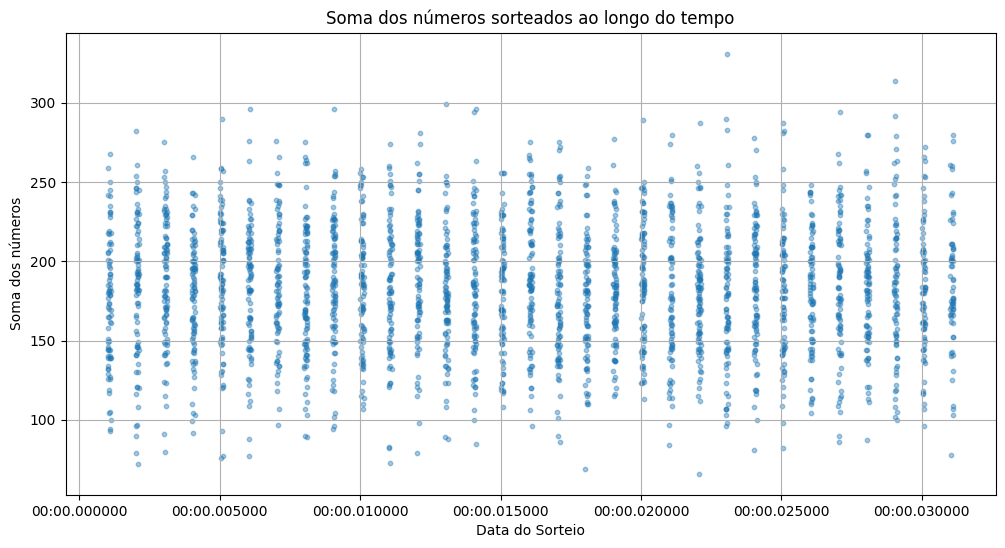

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df['Data do Sorteio'], df['Soma'], s=10, alpha=0.4)
plt.title("Soma dos números sorteados ao longo do tempo")
plt.xlabel("Data do Sorteio")
plt.ylabel("Soma dos números")
plt.grid(True)
plt.show()

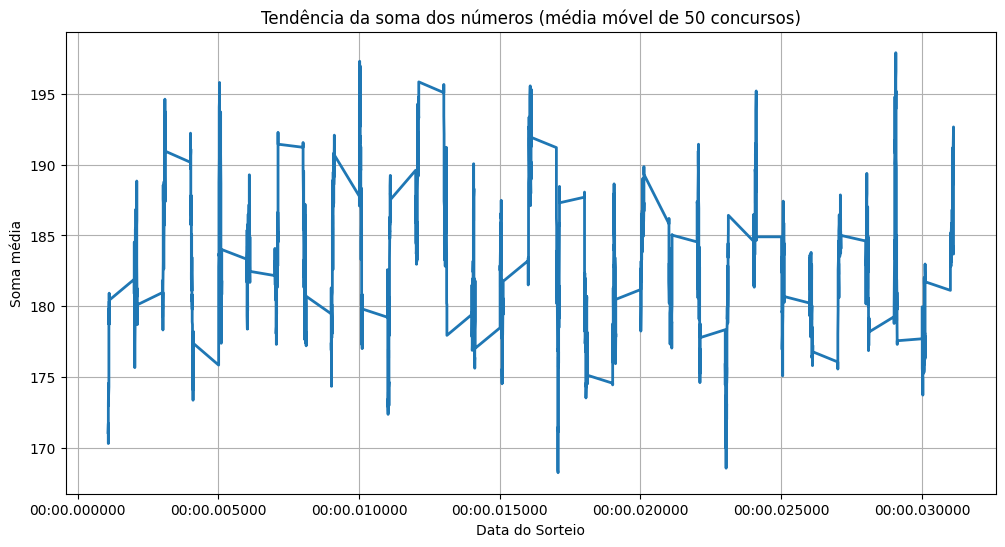

In [81]:
df_plot = df.sort_values('Data do Sorteio').copy()
df_plot['Media_Movel_50'] = df_plot['Soma'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_plot['Data do Sorteio'], df_plot['Media_Movel_50'], linewidth=2)
plt.title("Tendência da soma dos números (média móvel de 50 concursos)")
plt.xlabel("Data do Sorteio")
plt.ylabel("Soma média")
plt.grid(True)
plt.show()

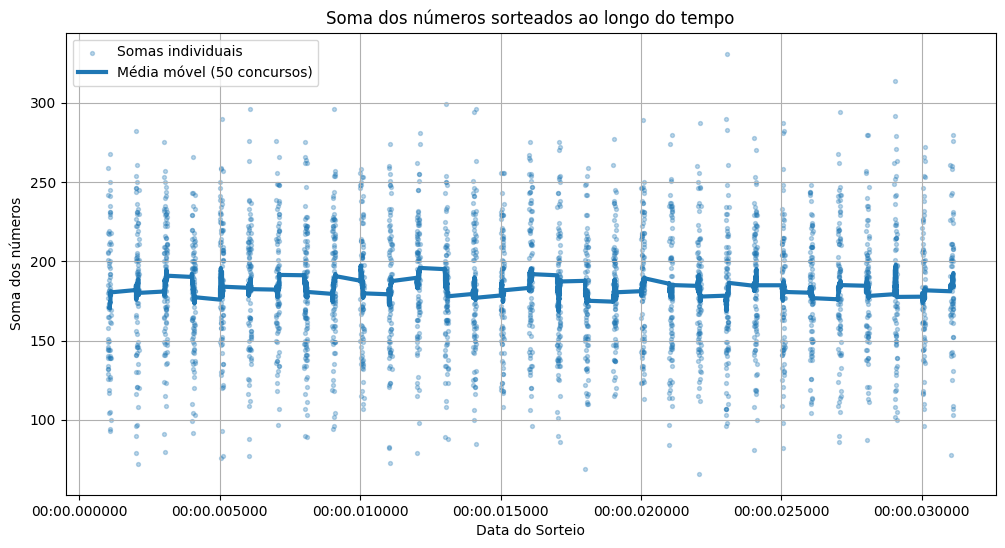

In [82]:
plt.figure(figsize=(12, 6))

# Pontos individuais
plt.scatter(
    df_plot['Data do Sorteio'],
    df_plot['Soma'],
    s=8,
    alpha=0.3,
    label='Somas individuais'
)

# Tendência
plt.plot(
    df_plot['Data do Sorteio'],
    df_plot['Media_Movel_50'],
    linewidth=3,
    label='Média móvel (50 concursos)'
)

plt.title("Soma dos números sorteados ao longo do tempo")
plt.xlabel("Data do Sorteio")
plt.ylabel("Soma dos números")
plt.legend()
plt.grid(True)
plt.show()

In [83]:
# Últimos 20 concursos (ou o valor da sua janela)
entrada = numeros_normalizados[-janela:]

# Ajustar para o formato da RNN (1, janela, 6)
entrada = entrada.reshape(1, janela, 6)

In [84]:
# Previsão normalizada
prev_6_norm = modelo_rnn.predict(entrada)

# Desnormalizar
prev_6 = scaler.inverse_transform(prev_6_norm)

# Arredondar e converter para inteiros válidos
prev_6 = np.round(prev_6).astype(int)

print("Previsão dos próximos 6 números:")
print(prev_6[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Previsão dos próximos 6 números:
[ 7 16 25 34 44 50]


In [97]:
# Criar o 7º número a partir da previsão
set_prev = set(int(x) for x in prev_6[0])

while len(set_prev) < 7:
    novo = int(np.round(np.mean(prev_6[0]) + np.random.uniform(-5, 5)))
    if 1 <= novo <= 60:
        set_prev.add(novo)

prev_7 = sorted(int(x) for x in set_prev)

print("Previsão dos próximos 7 números:")
print(prev_7)

Previsão dos próximos 7 números:
[7, 16, 25, 27, 34, 44, 50]


# Transformers

# Histórico

Introduzido pelo artigo Attention Is All You Need, de Vaswani et al., em 2017, o modelo Transformer revolucionou o processamento de linguagem natural e outros domínios ao eliminar a dependência da sequência, que era essencial nas RNNs.

# Em que consiste

Transformers utilizam a arquitetura self-attention, que permite capturar relações entre elementos de dados independentes da posição sequencial. Isso é feito por meio de camadas de atenção, que ponderam a importância de cada token em relação aos demais.

Self-Attention: Permite que o modelo foque em partes diferentes da sequência para melhor contextualizar cada elemento.

Positional Encoding: Representa a ordem dos dados, permitindo que a rede mantenha informações sequenciais.

# Limitações

Complexidade computacional: Transformers exigem grande capacidade de processamento e memória.
Dependência de dados grandes: São altamente dependentes de grandes quantidades de dados para generalizar bem.
Alto custo de treinamento: Treinamento de Transformers requer infraestrutura avançada (GPUs ou TPUs).

# Como implementar

Dados: Podem ser usados com dados sequenciais, como texto e áudio.

Treinamento: O treinamento de Transformers envolve modelos pré-treinados (como BERT e GPT), mas também é possível treinar modelos do zero, se tiver dados suficientes.

Ferramentas e frameworks: Transformers são amplamente suportados pela biblioteca Hugging Face Transformers, além de PyTorch e TensorFlow.


In [86]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D

# Selecionar os números sorteados
numeros = df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].values

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
numeros_normalizados = scaler.fit_transform(numeros)

# Definir a sequência de entrada e saída (janela de tempo)
def criar_sequencias(dados, janela=3):
    X, y = [], []
    for i in range(len(dados) - janela):
        X.append(dados[i:i+janela])
        y.append(dados[i+janela])
    return np.array(X), np.array(y)

# Criar dados de treinamento e teste
janela = 3
X, y = criar_sequencias(numeros_normalizados, janela)

# Verificar a forma dos dados
#print(f"Forma de X: {X.shape}, y: {y.shape}")

# Dividir os dados entre treinamento e teste
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Função para criar bloco do Transformer
def transformer_block(inputs, num_heads, ff_dim, dropout=0.1):
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attention = Dropout(dropout)(attention)
    attention = LayerNormalization(epsilon=1e-6)(attention + inputs)

    ff = Dense(ff_dim, activation="relu")(attention)
    ff = Dense(inputs.shape[-1])(ff)
    ff = Dropout(dropout)(ff)
    out = LayerNormalization(epsilon=1e-6)(ff + attention)
    return out

# Construir o modelo Transformer
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# Bloco Transformer
transformer_out = transformer_block(input_layer, num_heads=4, ff_dim=32)

# Pooling para reduzir a dimensionalidade da saída
transformer_out = GlobalAveragePooling1D()(transformer_out)

# Camada de saída para prever os números sorteados
output_layer = Dense(6)(transformer_out)  # 6 saídas para os números sorteados

# Construir o modelo final
modelo_transformer = Model(inputs=input_layer, outputs=output_layer)
modelo_transformer.compile(optimizer='adam', loss='mean_squared_error')

# Resumo do modelo
modelo_transformer.summary()

# Treinar o modelo
modelo_transformer.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Testar o modelo
previsoes = modelo_transformer.predict(X_test)
previsoes_desnormalizadas = scaler.inverse_transform(previsoes)



Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 3, 6)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 3, 6)      │        654 │ input_layer_9[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 3, 6)      │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 3, 6)      │          0 │ dropout_1[0][0],  │
│                     │                   │            │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 3, 6)      │         12 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 3, 32)     │        224 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 3, 6)      │        198 │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 3, 6)      │          0 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 3, 6)      │          0 │ dropout_2[0][0],  │
│                     │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 3, 6)      │         12 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 6)         │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 6)         │         42 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,142 (4.46 KB)

 Trainable params: 1,142 (4.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.8009
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0922
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0593
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0478
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0427
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0389
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0389
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0374
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0370
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0389
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0366
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0380
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0364
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0359
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0363
Epoch 16/50
67/67 ━

In [87]:
# Exibir as primeiras 5 previsões
print(previsoes_desnormalizadas[:5])


[[ 8.2641   17.613478 26.160875 33.8793   42.97772  52.574703]
 [ 8.400337 17.475037 26.307077 33.724747 42.903202 52.69836 ]
 [ 8.403002 17.23439  26.497915 33.58324  42.736935 52.583267]
 [ 8.403992 17.130514 26.530413 33.539764 42.91444  52.775208]
 [ 8.445951 16.951817 26.435503 33.59475  42.95922  52.757347]]


In [88]:
# Criar uma matriz de correlação entre os números sorteados
correlacao = df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].corr()

# Exibir a matriz de correlação
print(correlacao)


          Bola1     Bola2     Bola3     Bola4     Bola5     Bola6
Bola1  1.000000  0.640548  0.457955  0.354022  0.248510  0.164200
Bola2  0.640548  1.000000  0.711563  0.532628  0.392294  0.263753
Bola3  0.457955  0.711563  1.000000  0.755567  0.561462  0.367758
Bola4  0.354022  0.532628  0.755567  1.000000  0.736017  0.491518
Bola5  0.248510  0.392294  0.561462  0.736017  1.000000  0.656245
Bola6  0.164200  0.263753  0.367758  0.491518  0.656245  1.000000


In [90]:
# Contar a frequência de cada número sorteado
numeros_sorteados = pd.concat([df['Bola1'], df['Bola2'], df['Bola3'], df['Bola4'], df['Bola5'], df['Bola6']])
frequencia_numeros = numeros_sorteados.value_counts().sort_index()

# Exibir as  frequências (Quantidade de vezes que cada número foi sorteado)
print(frequencia_numeros.head(60))

1     254
2     268
3     247
4     281
5     296
6     265
7     249
8     269
9     250
10    311
11    274
12    256
13    273
14    258
15    230
16    274
17    280
18    258
19    250
20    258
21    223
22    241
23    287
24    267
25    258
26    223
27    277
28    279
29    274
30    283
31    249
32    283
33    284
34    286
35    283
36    275
37    287
38    282
39    255
40    249
41    283
42    282
43    275
44    282
45    258
46    265
47    250
48    246
49    275
50    258
51    272
52    266
53    306
54    274
55    226
56    276
57    252
58    260
59    259
60    255
Name: count, dtype: int64


In [100]:
import pandas as pd

numeros_sorteados = pd.concat([df['Bola1'], df['Bola2'], df['Bola3'], df['Bola4'], df['Bola5'], df['Bola6']])
frequencia_numeros = numeros_sorteados.value_counts().sort_index()

top_6_numeros = frequencia_numeros.nlargest(7)

print("Os 7 números com maior frequência:")
print(top_6_numeros)

Os 7 números com maior frequência:
10    311
53    306
5     296
23    287
37    287
34    286
33    284
Name: count, dtype: int64


In [93]:
# Usar os últimos 'janela' concursos como entrada
ultima_entrada = numeros_normalizados[-janela:]  # shape (janela, 6)
ultima_entrada = ultima_entrada.reshape(1, janela, 6)

# Previsão normalizada
previsao_norm = modelo_transformer.predict(ultima_entrada)

# Desnormalizar
previsao_6 = scaler.inverse_transform(previsao_norm)[0]

# Arredondar e garantir inteiros válidos
previsao_6 = np.round(previsao_6).astype(int)

# Limitar ao intervalo da Mega-Sena (1 a 60)
previsao_6 = np.clip(previsao_6, 1, 60)

# Remover duplicatas e ordenar
previsao_6 = np.unique(previsao_6)

# Completar caso falte algum número
while len(previsao_6) < 6:
    n = np.random.randint(1, 61)
    if n not in previsao_6:
        previsao_6 = np.append(previsao_6, n)

previsao_6 = np.sort(previsao_6)

print("🎯 Previsão com 6 números:", previsao_6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
🎯 Previsão com 6 números: [ 8 17 26 34 43 52]


In [94]:
# Estratégia: número adicional baseado na média + ruído
media = int(np.mean(previsao_6))
novo_numero = media + np.random.randint(-5, 6)

# Garantir validade
novo_numero = np.clip(novo_numero, 1, 60)

# Evitar repetição
while novo_numero in previsao_6:
    novo_numero = np.random.randint(1, 61)

# Criar previsão com 7 números
previsao_7 = np.sort(np.append(previsao_6, novo_numero))

print("🎯 Previsão com 7 números:", previsao_7)

🎯 Previsão com 7 números: [ 8 17 26 34 43 52 55]
